# Data Washing and Analysis

In [1]:
%pwd

'/Users/lichao/Library/CloudStorage/OneDrive-KyushuUniversity/Course01_DataScienceForBa/Code'

## Import Package

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

Install once pip install; Import every time

## Folder Address Setting

In [3]:
Data_Folder = "../Data"
Code_Folder = "../Code"
Results_Folder = "../Results"

## Load Data

!pip install pyarrow        
error info -> chatgpt 

In [4]:
WahsedDataset = pd.read_parquet(os.path.join(Data_Folder, 'D02_WashedData_v1.parquet'))

In [5]:
WahsedDataset

,wave,INCOME_2,Cantril_ladder,Health_disable,Relative_have,Life_satisfaction,Living_standard_trend,Enough_food,Enough_shelter,Well_rested,...,Employment,Children_under15,Feeling_income,Born_here,Home_handline,Mobile_phone,Internet_access_available,Used_internet_recently,Phone_internet_access,Income_level
2051060,14,29887.446582,1.0,0.0,1.0,0.0,-0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2051061,14,53797.403847,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,6.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
2051062,14,17932.467949,6.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
2051063,14,2390.995727,4.0,0.0,1.0,1.0,-0.0,0.0,0.0,1.0,...,6.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2051064,14,14943.723291,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224776,15,29467.679074,3.0,0.0,0.0,0.0,-0.0,1.0,1.0,1.0,...,5.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2224777,15,0.000000,6.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2224778,15,58935.358147,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0
2224781,15,47148.286518,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0


In [7]:
WahsedDataset.head(20)

,wave,INCOME_2,Cantril_ladder,Health_disable,Relative_have,Life_satisfaction,Living_standard_trend,Enough_food,Enough_shelter,Well_rested,...,Employment,Children_under15,Feeling_income,Born_here,Home_handline,Mobile_phone,Internet_access_available,Used_internet_recently,Phone_internet_access,Income_level
2051060,14,29887.446582,1.0,0.0,1.0,0.0,-0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2051061,14,53797.403847,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,6.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
2051062,14,17932.467949,6.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
2051063,14,2390.995727,4.0,0.0,1.0,1.0,-0.0,0.0,0.0,1.0,...,6.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2051064,14,14943.723291,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2051065,14,0.000000,5.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,5.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2051066,14,17334.719017,6.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
2051067,14,59774.893164,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,6.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
2051068,14,20921.212607,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,6.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2051069,14,46624.416668,4.0,0.0,1.0,0.0,-0.0,1.0,0.0,0.0,...,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0


In [8]:
WahsedDataset.columns

Index(['wave', 'INCOME_2', 'Cantril_ladder', 'Health_disable', 'Relative_have',
       'Life_satisfaction', 'Living_standard_trend', 'Enough_food',
       'Enough_shelter', 'Well_rested', 'Respected', 'Smile',
       'Interesting_thing', 'Enjoyment', 'Physical_pain', 'Worry', 'Sadness',
       'Stress', 'Anger', 'City_satisfaction', 'Recommended_live_place',
       'Economic_rating', 'Economic_trend', 'Local_job_outlook',
       'Satisfied_pubtran', 'Satisfied_road', 'Satisfied_edu',
       'Satisfied_qualityair', 'Satisfied_qualitywater',
       'Satisfied_healthcare', 'Satisfied_affhouse', 'Satisfied_oppofriend',
       'Good_minorities', 'Good_homo', 'Good_immigrants', 'Donated',
       'Volunteer', 'Help_stranger', 'Voice_official',
       'Local_police_confidence', 'Safety_walk', 'Stolen', 'Assualted',
       'Religion_importance', 'Children_respected', 'Children_learn',
       'Women_respected', 'Satisfied_dealpoor', 'Satisfied_Env_preservation',
       'Satisfied_Personalfreedom

In [9]:
WahsedDataset.describe()

,wave,INCOME_2,Cantril_ladder,Health_disable,Relative_have,Life_satisfaction,Living_standard_trend,Enough_food,Enough_shelter,Well_rested,...,Employment,Children_under15,Feeling_income,Born_here,Home_handline,Mobile_phone,Internet_access_available,Used_internet_recently,Phone_internet_access,Income_level
count,6619.000000,6.619000e+03,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,...,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000
mean,14.484212,3.457830e+04,5.464572,0.135519,0.819610,0.822330,0.736516,0.143526,0.156519,0.836380,...,3.061339,0.443723,2.220124,0.998942,0.134764,0.971295,0.781538,0.738329,0.825653,3.151685
std,0.499788,1.063651e+05,2.340546,0.342303,0.384541,0.382264,0.585212,0.350635,0.363374,0.369958,...,2.200411,0.496860,0.735932,0.032505,0.341497,0.166989,0.413234,0.439578,0.379436,1.419530
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,8.966234e+03,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,14.000000,1.793247e+04,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,15.000000,3.241445e+04,7.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,6.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,15.000000,5.893536e+06,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


50% == median

In [15]:
WahsedDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
wave,6619.0,14.484212,0.499788,14.0,14.000000,14.000000,15.000000,1.500000e+01
INCOME_2,6619.0,34578.295399,106365.148026,0.0,8966.233975,17932.467949,32414.446981,5.893536e+06
Cantril_ladder,6619.0,5.464572,2.340546,0.0,4.000000,5.000000,7.000000,1.000000e+01
Health_disable,6619.0,0.135519,0.342303,0.0,0.000000,0.000000,0.000000,1.000000e+00
Relative_have,6619.0,0.819610,0.384541,0.0,1.000000,1.000000,1.000000,1.000000e+00
...,...,...,...,...,...,...,...,...
Mobile_phone,6619.0,0.971295,0.166989,0.0,1.000000,1.000000,1.000000,1.000000e+00
Internet_access_available,6619.0,0.781538,0.413234,0.0,1.000000,1.000000,1.000000,1.000000e+00
Used_internet_recently,6619.0,0.738329,0.439578,0.0,0.000000,1.000000,1.000000,1.000000e+00
Phone_internet_access,6619.0,0.825653,0.379436,0.0,1.000000,1.000000,1.000000,1.000000e+00


Transpose

In [13]:
WahsedDataset.describe().T.to_csv('../Results/Summary.csv')

## Build X and Y Regression - Cantril Ladder

Well Being = Other Variables (age, gender, income ...)

dependent varible = Well-being -> Cantril Ladder

In [16]:
y = WahsedDataset['Cantril_ladder']

1 - 10

In [17]:
y

2051060    1.0
2051061    4.0
2051062    6.0
2051063    4.0
2051064    1.0
          ... 
2224776    3.0
2224777    6.0
2224778    5.0
2224781    5.0
2224782    9.0
Name: Cantril_ladder, Length: 6619, dtype: float64

In [18]:
X = WahsedDataset.drop(columns = ['Cantril_ladder'])

In [19]:
X

,wave,INCOME_2,Health_disable,Relative_have,Life_satisfaction,Living_standard_trend,Enough_food,Enough_shelter,Well_rested,Respected,...,Employment,Children_under15,Feeling_income,Born_here,Home_handline,Mobile_phone,Internet_access_available,Used_internet_recently,Phone_internet_access,Income_level
2051060,14,29887.446582,0.0,1.0,0.0,-0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2051061,14,53797.403847,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,6.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
2051062,14,17932.467949,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
2051063,14,2390.995727,0.0,1.0,1.0,-0.0,0.0,0.0,1.0,1.0,...,6.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2051064,14,14943.723291,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224776,15,29467.679074,0.0,0.0,0.0,-0.0,1.0,1.0,1.0,1.0,...,5.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2224777,15,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2224778,15,58935.358147,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0
2224781,15,47148.286518,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0


In [20]:
X.columns

Index(['wave', 'INCOME_2', 'Health_disable', 'Relative_have',
       'Life_satisfaction', 'Living_standard_trend', 'Enough_food',
       'Enough_shelter', 'Well_rested', 'Respected', 'Smile',
       'Interesting_thing', 'Enjoyment', 'Physical_pain', 'Worry', 'Sadness',
       'Stress', 'Anger', 'City_satisfaction', 'Recommended_live_place',
       'Economic_rating', 'Economic_trend', 'Local_job_outlook',
       'Satisfied_pubtran', 'Satisfied_road', 'Satisfied_edu',
       'Satisfied_qualityair', 'Satisfied_qualitywater',
       'Satisfied_healthcare', 'Satisfied_affhouse', 'Satisfied_oppofriend',
       'Good_minorities', 'Good_homo', 'Good_immigrants', 'Donated',
       'Volunteer', 'Help_stranger', 'Voice_official',
       'Local_police_confidence', 'Safety_walk', 'Stolen', 'Assualted',
       'Religion_importance', 'Children_respected', 'Children_learn',
       'Women_respected', 'Satisfied_dealpoor', 'Satisfied_Env_preservation',
       'Satisfied_Personalfreedom', 'Confidence_mil

machine learning       
fit == training   

In [21]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
for coef, name in zip(model.coef_, X.columns.to_list()):
    print(f"{name}: {coef:.4f}")

wave: 0.8219
INCOME_2: -0.0000
Health_disable: -0.1255
Relative_have: 0.1087
Life_satisfaction: 0.9804
Living_standard_trend: 0.4055
Enough_food: -0.2057
Enough_shelter: -0.1605
Well_rested: 0.1956
Respected: -0.0952
Smile: 0.1081
Interesting_thing: 0.2105
Enjoyment: 0.1128
Physical_pain: 0.1097
Worry: 0.0050
Sadness: -0.1677
Stress: -0.1472
Anger: 0.0427
City_satisfaction: -0.0101
Recommended_live_place: 0.0647
Economic_rating: 0.2417
Economic_trend: 0.0319
Local_job_outlook: 0.0618
Satisfied_pubtran: -0.1485
Satisfied_road: 0.0367
Satisfied_edu: -0.0891
Satisfied_qualityair: 0.0122
Satisfied_qualitywater: -0.0264
Satisfied_healthcare: 0.1006
Satisfied_affhouse: 0.1311
Satisfied_oppofriend: -0.0995
Good_minorities: -0.0889
Good_homo: 0.0924
Good_immigrants: 0.0000
Donated: 0.1082
Volunteer: 0.3039
Help_stranger: 0.0506
Voice_official: 0.2954
Local_police_confidence: 0.0000
Safety_walk: -0.0395
Stolen: -0.0694
Assualted: -0.1023
Religion_importance: 0.2316
Children_respected: -0.0456
C

Prediction

In [22]:
# Making predictions
y_pred = model.predict(X)

In [32]:
y_pred

array([4.79411989, 5.64118298, 6.38098121, ..., 6.28234819, 5.93543175,
       6.94322295])

In [33]:
errors = y - y_pred # residuals

In [34]:
errors

2051060   -3.794120
2051061   -1.641183
2051062   -0.380981
2051063   -1.113416
2051064   -4.768897
             ...   
2224776   -1.324999
2224777    0.437234
2224778   -1.282348
2224781   -0.935432
2224782    2.056777
Name: Cantril_ladder, Length: 6619, dtype: float64

In [35]:
# Computing R2, MSE, and MAE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Printing the results
print(f"R² Score: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 27.82%
Mean Squared Error: 3.95
Mean Absolute Error: 1.53


### Residuals

In [36]:
# Calculate residuals
residuals = y - y_pred

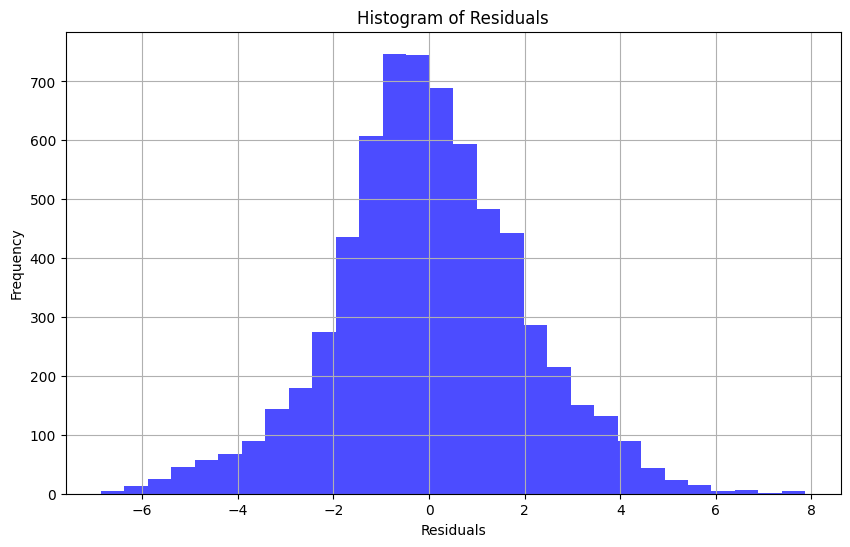

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### RF test

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [39]:
# Making predictions
y_pred = model.predict(X)

In [40]:
y_pred

array([2.25, 4.68, 6.29, ..., 5.64, 5.15, 8.05])

In [41]:
errors = y - y_pred

In [42]:
errors

2051060   -1.25
2051061   -0.68
2051062   -0.29
2051063    0.12
2051064   -1.52
           ... 
2224776   -0.34
2224777    0.37
2224778   -0.64
2224781   -0.15
2224782    0.95
Name: Cantril_ladder, Length: 6619, dtype: float64

In [43]:
# Computing R2, MSE, and MAE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Printing the results
print(f"R² Score: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 89.61%
Mean Squared Error: 0.57
Mean Absolute Error: 0.57


### Cross-validation

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
X_train.shape

(5957, 72)

In [46]:
X_test.shape

(662, 72)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Making predictions
y_pred = model.predict(X_test)

# Computing R2, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the results
print(f"R² Score: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 27.93%
Mean Squared Error: 4.31
Mean Absolute Error: 1.59


### Random Forest - CV

StatQuest -- Recommend Youtuber

In [50]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Making predictions
y_pred = model.predict(X_test)

# Computing R2, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the results
print(f"R² Score: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 27.99%
Mean Squared Error: 4.30
Mean Absolute Error: 1.58


In [52]:
model = RandomForestRegressor(n_estimators=5, random_state=42) 
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [53]:
# Making predictions
y_pred = model.predict(X_test)

# Computing R2, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the results
print(f"R² Score: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 12.00%
Mean Squared Error: 5.26
Mean Absolute Error: 1.78


Dts n_estimators <- datasize

## Build X and Y Classification -- LS

In [54]:
y = WahsedDataset['Life_satisfaction']

Question: do you satisfy with your life:    
1, yes     
0, no

In [55]:
X = WahsedDataset.drop(columns = ['Cantril_ladder', 'Life_satisfaction'])

In [56]:
model = LogisticRegression()
model.fit(X, y)

/Users/lichao/opt/anaconda3/envs/course01/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Making predictions
y_pred = model.predict(X)

In [58]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
y

2051060    0.0
2051061    1.0
2051062    1.0
2051063    1.0
2051064    0.0
          ... 
2224776    0.0
2224777    0.0
2224778    1.0
2224781    0.0
2224782    1.0
Name: Life_satisfaction, Length: 6619, dtype: float64

Accuracy: 0.86


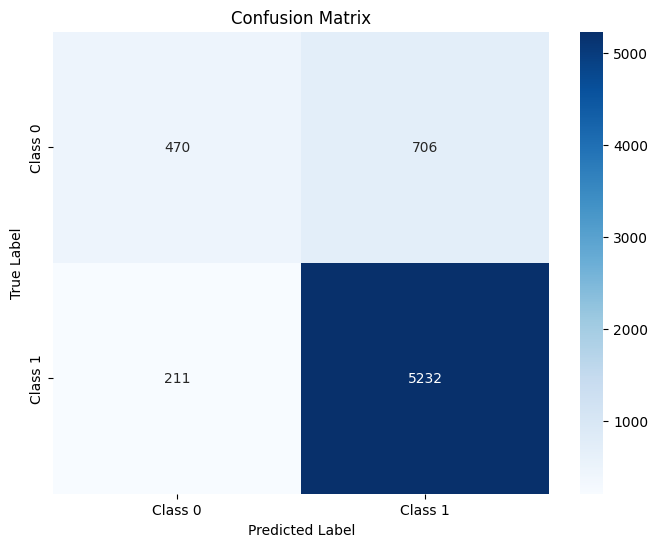

              precision    recall  f1-score   support

         0.0       0.69      0.40      0.51      1176
         1.0       0.88      0.96      0.92      5443

    accuracy                           0.86      6619
   macro avg       0.79      0.68      0.71      6619
weighted avg       0.85      0.86      0.85      6619



In [60]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print(classification_report(y, y_pred))


### Residuals

In [ ]:
probabilities = model.predict_proba(X)

In [ ]:
residuals = y - probabilities[:,1]

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Cross-validation

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/lichao/opt/anaconda3/envs/course01/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# Making predictions
y_pred = model.predict(X_test)

Accuracy: 0.86


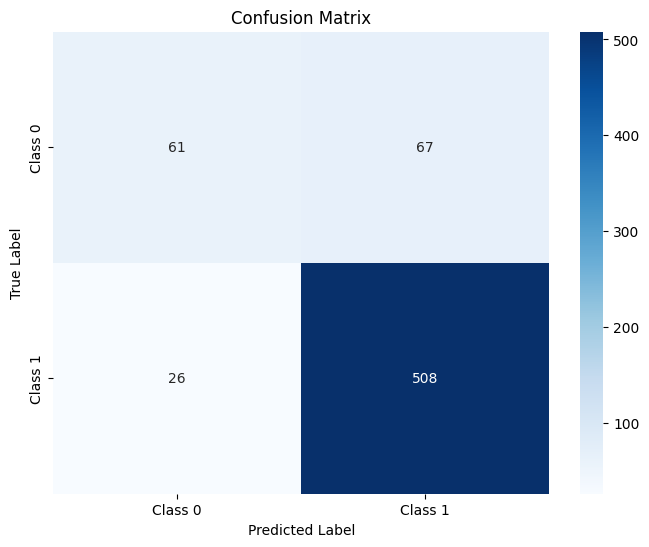

              precision    recall  f1-score   support

         0.0       0.70      0.48      0.57       128
         1.0       0.88      0.95      0.92       534

    accuracy                           0.86       662
   macro avg       0.79      0.71      0.74       662
weighted avg       0.85      0.86      0.85       662



In [66]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))


### Random Forest

In [67]:
# Initialize the RandomForestRegressor
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [68]:
# Making predictions
y_pred = model.predict(X)

Accuracy: 1.00


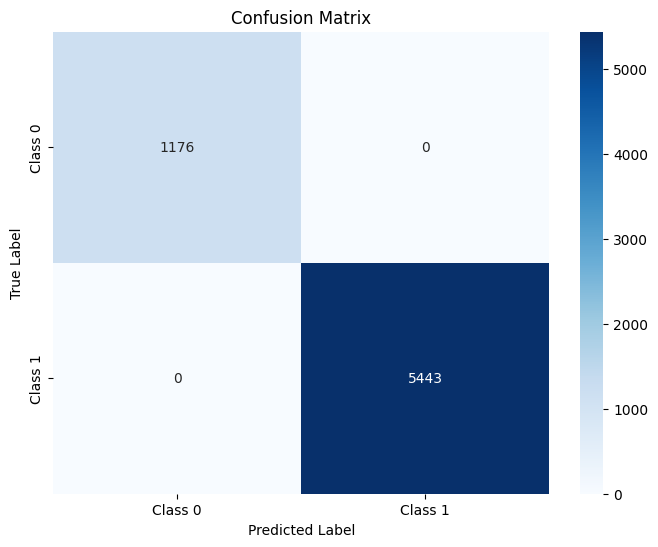

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1176
         1.0       1.00      1.00      1.00      5443

    accuracy                           1.00      6619
   macro avg       1.00      1.00      1.00      6619
weighted avg       1.00      1.00      1.00      6619



In [69]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print(classification_report(y, y_pred))


### CV RF

In [70]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Making predictions
y_pred = model.predict(X_test)

Accuracy: 0.86


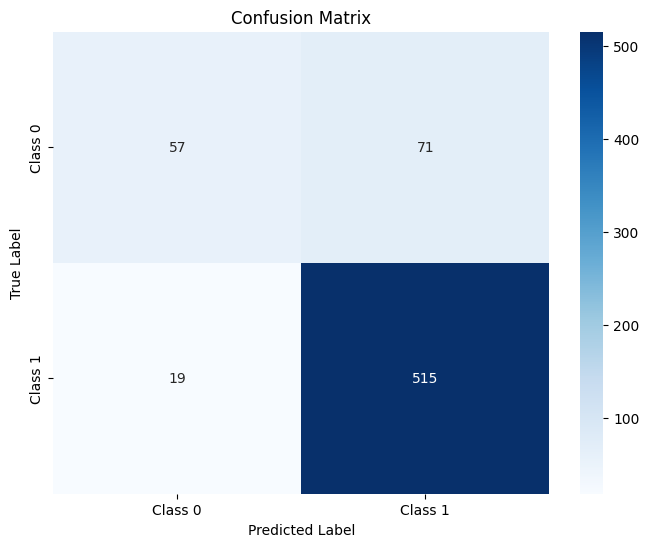

              precision    recall  f1-score   support

         0.0       0.75      0.45      0.56       128
         1.0       0.88      0.96      0.92       534

    accuracy                           0.86       662
   macro avg       0.81      0.70      0.74       662
weighted avg       0.85      0.86      0.85       662



In [72]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))
